In [1]:
import pandas as pd
import matplotlib.dates as mdates

In [2]:
# load data
bitcoin_daily = pd.read_csv("../Data/bitcoin_news_sentiment_daily_lag1.csv")
coin_daily = pd.read_csv("../Data/coinbase_news_sentiment_daily_lag1.csv")
google_trends = pd.read_csv("../google_search/google_trends_signal_daily.csv")
non_sentiment = pd.read_csv("../Data/features_lag1.csv")
# btc_returns = pd.read_csv("../target_variable/BTC_return.csv")
twitter_sentiment = pd.read_csv("../Data/BB_sentiment_lag1.csv")

In [3]:
twitter_sentiment = twitter_sentiment.rename(columns={"Unnamed: 0": "date_dt"})
twitter_sentiment.set_index("date_dt", inplace=True)
twitter_sentiment.head()

,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_PUBLICATION_COUNT,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_SENTIMENT_DAILY_MAX,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_SENTIMENT_DAILY_MIN,NEWS_SENTIMENT_DAILY_AVG
date_dt,,,,,,,,
2021-04-02,0.0032,10.0,1.0,1.0,0.1068,14.0,-0.1068,-0.6321
2021-04-03,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-04,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-05,0.0019,174.0,2.0,8.0,0.1068,169.0,-0.1068,0.0005
2021-04-06,0.0025,41.0,1.0,2.0,0.1070,34.0,0.0000,0.0000


In [4]:
bitcoin_daily.set_index("date_dt", inplace=True)
bitcoin_daily = bitcoin_daily.rename(columns={"signal": "btc_signal"})
bitcoin_daily

,positive_count,negative_count,neutral_count,positive_avg_score,negative_avg_score,neutral_avg_score,total_news_count,total_news_score,btc_signal
date_dt,,,,,,,,,
2021-04-15,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667
2021-04-16,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000
2021-04-17,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333
2021-04-19,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000
2021-04-20,3.0,5.0,2.0,0.867508,0.785641,0.786232,10.0,-1.325679,-0.250000
...,...,...,...,...,...,...,...,...,...
2024-03-09,3.0,1.0,0.0,0.774210,0.975991,0.000000,4.0,1.346641,0.500000
2024-03-12,9.0,0.0,1.0,0.798569,0.000000,0.871973,10.0,7.187121,1.000000
2024-03-13,3.0,0.0,1.0,0.821627,0.000000,0.901766,4.0,2.464880,1.000000


In [5]:
coin_daily.set_index("date_dt", inplace=True)
# add coinbase prefix to columns
coin_daily.columns = ["coinbase_" + col for col in coin_daily.columns]
coin_daily

,coinbase_positive_count,coinbase_negative_count,coinbase_neutral_count,coinbase_positive_avg_score,coinbase_negative_avg_score,coinbase_neutral_avg_score,coinbase_total_news_count,coinbase_total_news_score,coinbase_signal
date_dt,,,,,,,,,
2021-04-14,1.0,0.0,2.0,0.757015,0.000000,0.798267,3.0,0.757015,1.000000
2021-04-15,44.0,23.0,94.0,0.786364,0.817363,0.884039,161.0,15.800687,0.313433
2021-04-16,51.0,28.0,73.0,0.823400,0.890134,0.858108,152.0,17.069669,0.291139
2021-04-17,14.0,12.0,44.0,0.794744,0.798550,0.832263,70.0,1.543818,0.076923
2021-04-18,3.0,2.0,9.0,0.662382,0.733936,0.782948,14.0,0.519273,0.200000
...,...,...,...,...,...,...,...,...,...
2024-03-13,7.0,2.0,18.0,0.814736,0.759975,0.912939,27.0,4.183200,0.555556
2024-03-14,2.0,4.0,18.0,0.818522,0.771731,0.851901,24.0,-1.449878,-0.333333
2024-03-15,5.0,3.0,5.0,0.833427,0.977488,0.903085,13.0,1.234667,0.250000


In [6]:
# set date to date_dt
google_trends.set_index("date", inplace=True)
# chance index name to date_dt
google_trends.index.name = "date_dt"
# lagging seven days because the data is a weekly number,
# and we want to make sure we are not using future data
google_trends = google_trends.shift(7)
google_trends.dropna(inplace=True)
google_trends.head()

,signal
date_dt,
2021-04-18,0.137663
2021-04-19,0.137663
2021-04-20,0.137663
2021-04-21,0.137663
2021-04-22,0.137663


In [7]:
non_sentiment.set_index("date_dt", inplace=True)
# non_sentiment.index.names = ["date_dt"]
non_sentiment

,Open,High,Low,Close,Adj Close,Volume,close_open,Daily Return,cumulative_return,30D_Moving_STD,...,DTB3_lag1,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-05-18,46415.898438,46623.558594,42207.289062,43537.511719,43537.511719,7.490364e+10,-2878.386719,-0.062824,-0.310130,4032.286073,...,0.01,0.01,2.68,2.68,4173.850098,4173.850098,18.809999,18.809999,0.000000,0.000000
2021-05-19,43488.058594,45812.457031,42367.832031,42909.402344,42909.402344,5.618737e+10,-578.656250,-0.014427,-0.320082,4454.545393,...,0.02,0.01,2.72,2.68,4163.290039,4173.850098,19.719999,18.809999,-0.002530,0.000000
2021-05-20,42944.976562,43546.117188,30681.496094,37002.441406,37002.441406,1.263581e+11,-5942.535156,-0.137661,-0.413681,5322.282977,...,0.02,0.02,2.72,2.72,4127.830078,4163.290039,21.340000,19.719999,-0.008517,-0.002530
2021-05-21,36753.667969,42462.984375,35050.617188,40782.738281,40782.738281,8.828194e+10,4029.070312,0.102163,-0.353780,5689.081641,...,0.01,0.02,2.66,2.72,4115.680176,4127.830078,22.180000,21.340000,-0.002943,-0.008517
2021-05-22,40596.949219,42172.171875,33616.453125,37304.691406,37304.691406,8.205162e+10,-3292.257812,-0.085282,-0.408891,6283.587516,...,0.01,0.01,2.59,2.66,4159.120117,4115.680176,20.670000,22.180000,0.010555,-0.002943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,2.005094e+10,1685.867188,0.024242,0.130312,3054.432327,...,5.23,5.23,2.38,2.38,5254.350098,5254.350098,13.010000,13.010000,0.000000,0.000000
2024-04-02,71333.484375,71342.093750,68110.695312,69702.148438,69702.148438,3.487353e+10,-1631.335938,-0.022871,0.104460,2863.107821,...,5.23,5.23,2.38,2.38,5254.350098,5254.350098,13.010000,13.010000,0.000000,0.000000
2024-04-03,69705.023438,69708.382812,64586.593750,65446.972656,65446.972656,5.070524e+10,-4258.050781,-0.061048,0.037035,2754.968124,...,5.23,5.23,2.41,2.38,5243.770020,5254.350098,13.650000,13.010000,-0.002014,0.000000


In [8]:
# btc_returns.set_index("Unnamed: 0", inplace=True)
# btc_returns.index.names = ["date_dt"]
# btc_returns.head()

In [9]:
# merge data on returns
data = pd.merge(bitcoin_daily, coin_daily, on="date_dt", how="left")
data = pd.merge(data, google_trends, on="date_dt", how="left")
data = pd.merge(data, non_sentiment, on="date_dt", how="left")
# data = pd.merge(data, btc_returns, on="date_dt", how="left")
data = pd.merge(data, twitter_sentiment, on="date_dt", how="left")

data

,positive_count,negative_count,neutral_count,positive_avg_score,negative_avg_score,neutral_avg_score,total_news_count,total_news_score,btc_signal,coinbase_positive_count,...,S&P_Return_lag1,S&P_Return_lag2,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_PUBLICATION_COUNT,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_SENTIMENT_DAILY_MAX,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_SENTIMENT_DAILY_MIN,NEWS_SENTIMENT_DAILY_AVG
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667,44.0,...,NaN,NaN,0.0064,7425.0,241.0,544.0,0.1311,6209.0,-0.0053,0.0101
2021-04-16,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000,51.0,...,NaN,NaN,-0.0073,27665.0,2092.0,1964.0,0.0867,22738.0,-0.0229,0.0903
2021-04-17,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333,14.0,...,NaN,NaN,-0.0099,6715.0,563.0,563.0,0.2201,5262.0,-0.0940,0.1233
2021-04-19,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000,5.0,...,NaN,NaN,-0.0099,6715.0,563.0,563.0,0.2201,5262.0,-0.0940,0.1233
2021-04-20,3.0,5.0,2.0,0.867508,0.785641,0.786232,10.0,-1.325679,-0.250000,20.0,...,NaN,NaN,-0.0069,2046.0,152.0,125.0,0.0520,1694.0,-0.1547,-0.1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-09,3.0,1.0,0.0,0.774210,0.975991,0.000000,4.0,1.346641,0.500000,7.0,...,0.010304,0.005141,0.0075,584.0,4.0,14.0,0.4438,150.0,-0.1830,-0.0007
2024-03-12,9.0,0.0,1.0,0.798569,0.000000,0.871973,10.0,7.187121,1.000000,10.0,...,0.000000,0.000000,0.0214,451.0,6.0,17.0,0.4438,107.0,-0.1830,0.3934
2024-03-13,3.0,0.0,1.0,0.821627,0.000000,0.901766,4.0,2.464880,1.000000,7.0,...,-0.001122,0.000000,0.0361,812.0,9.0,34.0,0.4438,166.0,-0.1830,0.1205


In [10]:
# save data
data.to_csv(r"../Data/Aggregated_Final_Data.csv")

In [11]:
# # # make sweetviz report
# import sweetviz as sv

# report = sv.analyze(data)

# # # save report
# report.show_html("../EDA/eda_report.html")

In [12]:
data

,positive_count,negative_count,neutral_count,positive_avg_score,negative_avg_score,neutral_avg_score,total_news_count,total_news_score,btc_signal,coinbase_positive_count,...,S&P_Return_lag1,S&P_Return_lag2,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_PUBLICATION_COUNT,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_SENTIMENT_DAILY_MAX,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_SENTIMENT_DAILY_MIN,NEWS_SENTIMENT_DAILY_AVG
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,0.666667,44.0,...,NaN,NaN,0.0064,7425.0,241.0,544.0,0.1311,6209.0,-0.0053,0.0101
2021-04-16,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,-0.250000,51.0,...,NaN,NaN,-0.0073,27665.0,2092.0,1964.0,0.0867,22738.0,-0.0229,0.0903
2021-04-17,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,-0.333333,14.0,...,NaN,NaN,-0.0099,6715.0,563.0,563.0,0.2201,5262.0,-0.0940,0.1233
2021-04-19,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,-0.500000,5.0,...,NaN,NaN,-0.0099,6715.0,563.0,563.0,0.2201,5262.0,-0.0940,0.1233
2021-04-20,3.0,5.0,2.0,0.867508,0.785641,0.786232,10.0,-1.325679,-0.250000,20.0,...,NaN,NaN,-0.0069,2046.0,152.0,125.0,0.0520,1694.0,-0.1547,-0.1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-09,3.0,1.0,0.0,0.774210,0.975991,0.000000,4.0,1.346641,0.500000,7.0,...,0.010304,0.005141,0.0075,584.0,4.0,14.0,0.4438,150.0,-0.1830,-0.0007
2024-03-12,9.0,0.0,1.0,0.798569,0.000000,0.871973,10.0,7.187121,1.000000,10.0,...,0.000000,0.000000,0.0214,451.0,6.0,17.0,0.4438,107.0,-0.1830,0.3934
2024-03-13,3.0,0.0,1.0,0.821627,0.000000,0.901766,4.0,2.464880,1.000000,7.0,...,-0.001122,0.000000,0.0361,812.0,9.0,34.0,0.4438,166.0,-0.1830,0.1205


In [16]:
import pandas as pd

data = pd.read_csv("../Data/combined_Lin.csv")
# foreward fill the missing values
data = data.fillna(method="ffill")
# drop all data after "2023-03-01"
data = data[data["date_dt"] <= "2024-04-18"]
# make date_dt the index
data.set_index("date_dt", inplace=True)
# data["Relative_Intraday_Price_Change"] = data["Relative_Intraday_Price_Change"].shift(3)
btc_returns = pd.read_csv("../data/BTC_return.csv")
btc_returns.set_index("Unnamed: 0", inplace=True)
# shift the returns by 1 day
# data["Daily Return"] = data["Daily Return"].shift(-1)
# drop the last row
# data = data.iloc[:-1]

# merge the returns
data = pd.merge(data, btc_returns, left_index=True, right_index=True, how="left")
# drop Daily Return column
data = data.drop(columns=["Daily Return"])
# rename the column to Reutn column to Daily Return
data = data.rename(columns={"Returns": "Daily Return"})
# lag gg_trends by 7 days to ensure no future data
data["gg_trend"] = data["gg_trend"].shift(7)

data.dropna(inplace=True)

# data drop if date > 2024-03-19
data = data[data.index <= "2024-03-19"]
# data.tail()

# save the data
data.to_csv("../Data/Aggregated_Final_Lin_Rakeen_Fixed_returns.csv")

/var/folders/m_/vmrb1n7d72xbmht2l2jtc4fh0000gn/T/ipykernel_91036/3397342724.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


In [8]:
(data["Daily Return"] * 100).tail(20)

date_dt
2024-03-13    2.216690
2024-03-14   -2.335246
2024-03-15   -2.830892
2024-03-16   -6.071773
2024-03-17    4.601224
2024-03-18   -1.238851
2024-03-19   -8.712073
2024-03-20    9.251085
2024-03-21   -3.631867
2024-03-22   -2.649845
2024-03-23    0.443429
2024-03-24    4.832709
2024-03-25    3.972505
2024-03-26    0.041478
2024-03-27   -0.763744
2024-03-28    1.839719
2024-03-29   -1.211816
2024-03-30   -0.354776
2024-03-31    2.395286
2024-04-02   -6.265395
Name: Daily Return, dtype: float64

In [49]:
# plot index vs Close
pp = data[["Close", "Open", "Daily Return"]]

pp.head(50)

,Close,Open,Daily Return
date_dt,,,
2021-04-15,63109.695312,63523.753906,0.003237
2021-04-16,63314.011719,63075.195312,-0.027501
2021-04-17,61572.789062,63258.503906,-0.014438
2021-04-18,60683.820312,61529.921875,-0.073622
2021-04-19,56216.183594,60701.886719,-0.008750
2021-04-20,55724.265625,56191.585938,0.013437
2021-04-21,56473.031250,55681.792969,-0.045454
2021-04-22,53906.089844,56471.128906,-0.039769
2021-04-23,51762.273438,53857.105469,-0.012917


In [103]:
# # make sweetviz report
# import sweetviz as sv

# report = sv.analyze(data)

# # # save report
# report.show_html("../EDA/eda_report_ll.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:04 -> (00:00 left)


Report ../EDA/eda_report_ll.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Mean Squared Error: 0.0007800062211717701
R Squared: -0.22741859903438733
Adjusted R Squared: -0.268756531126219


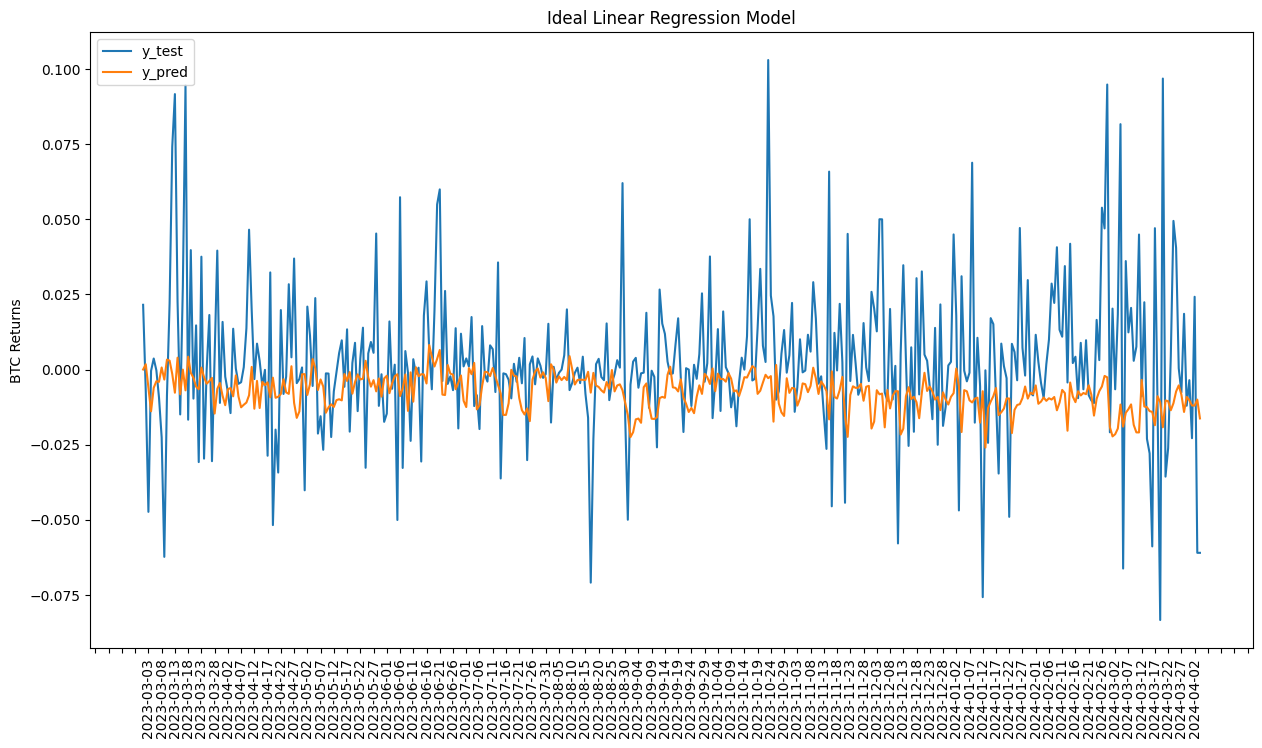

In [50]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error


# cumulative sum for last 100 days of news sentiment
data["total_news_score_lag_100_sum"] = (
    data["total_news_score_bitcoin"].rolling(100).sum()
)

cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count_bitcoin",
    "positive_count_bitcoin",
    "total_news_score_bitcoin",
    "negative_avg_score_bitcoin",
    "positive_avg_score_bitcoin",
    "signal_bitcoin",
    "gg_trend",
    "total_news_score_lag_100_sum",
    "Relative_Intraday_Price_Change",
    "Daily Return",
]

data = data[cols]
# drop rows with missing values
data = data.dropna()

X = data[cols].drop(columns=["Daily Return"])
y = data["Daily Return"]

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# plot results
import matplotlib.pyplot as plt

plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")
plt.legend()
plt.title("Ideal Linear Regression Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel("BTC Returns")
plt.show()

In [99]:
results

,y_test,y_pred,residuals
date_dt,,,
2023-03-01,-0.015964,-0.016192,0.000228
2023-03-02,0.021566,0.021047,0.000520
2023-03-03,-0.007235,-0.006701,-0.000534
2023-03-04,-0.047402,-0.046878,-0.000525
2023-03-05,-0.000417,-0.000117,-0.000300
2023-03-06,0.003676,0.004121,-0.000445
2023-03-07,-0.000257,0.000161,-0.000418
2023-03-08,-0.009362,-0.008858,-0.000504
2023-03-09,-0.022579,-0.021736,-0.000842


In [166]:
# linear regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# cumulative sum for last 100 days of news sentiment
data["total_news_score_lag_100_sum"] = (
    data["total_news_score_bitcoin"].rolling(100).sum()
)

cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count_bitcoin",
    "positive_count_bitcoin",
    "total_news_score_bitcoin",
    "negative_avg_score_bitcoin",
    "positive_avg_score_bitcoin",
    "signal_bitcoin",
    "gg_trend",
    "total_news_score_lag_100_sum",
    "Relative_Intraday_Price_Change",
    "Direction",
]

data = data[cols]
# drop rows with missing values
data = data.dropna()

X = data[cols].drop(columns=["Direction"])
y = data["Direction"]

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions
# y_pred = model.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold value: {optimal_threshold}")

# Use the optimal threshold to classify the probabilities into classes
y_pred = np.where(y_pred_proba >= optimal_threshold, 1, 0)

# evaluate model
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix: \n{conf_matrix}")

# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# plot results
import matplotlib.pyplot as plt

plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")
plt.legend()
plt.title("Ideal Linear Regression Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel("BTC Returns")
plt.show()

KeyError: "['Direction'] not in index"

In [51]:
# count mising values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing

stoch_%K                             1
stoch_%D                             1
S&P500 Return                        1
rsi                                  1
negative_count_bitcoin             576
positive_count_bitcoin             576
total_news_score_bitcoin           576
negative_avg_score_bitcoin         576
positive_avg_score_bitcoin         576
signal_bitcoin                     576
gg_trend                            11
total_news_score_lag_100_sum      1086
Relative_Intraday_Price_Change       1
Direction                            3
dtype: int64

In [36]:
dd = data.dropna()
dd

,stoch_%K,stoch_%D,S&P500 Return,rsi,negative_count_bitcoin,positive_count_bitcoin,total_news_score_bitcoin,negative_avg_score_bitcoin,positive_avg_score_bitcoin,signal_bitcoin,gg_trend,total_news_score_lag_100_sum,Relative_Intraday_Price_Change,Direction
date_dt,,,,,,,,,,,,,,


In [14]:
# check for missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

In [169]:
from sklearn.metrics import mean_squared_error
import joblib

# split data
cols = [
    "stoch_%K",
    "stoch_%D",
    "S&P500 Return",
    "rsi",
    "negative_count",
    "positive_count",
    "total_news_score",
    "negative_avg_score",
    "positive_avg_score",
    "btc_signal",
    "signal",
    "total_news_score_lag_100_sum",
    "Relative_Intraday_Price_Change",
    "Daily Return",
]
X = data[cols].drop(columns=["Daily Return"])
y = data["Daily Return"]

split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# print adjusted r squared
n = X_test.shape[0]
p = X_test.shape[1]
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared: {adj_r_squared}")

# save model
# joblib.dump(model, "../Modeling/models/LR_model_ideal.pkl")

KeyError: "['negative_count', 'positive_count', 'total_news_score', 'negative_avg_score', 'positive_avg_score', 'btc_signal', 'signal'] not in index"

In [16]:
# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
results.to_csv("../Modeling/models/LR_results_ideal.csv")

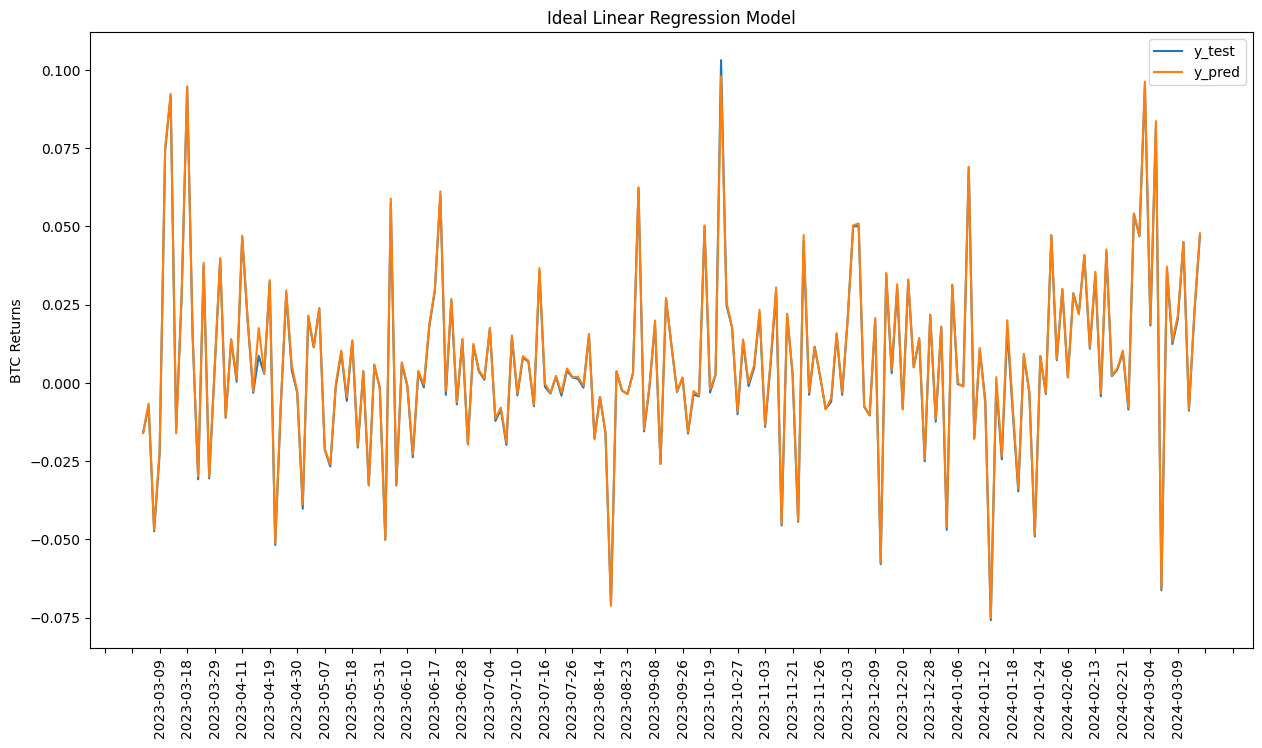

In [17]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")
plt.legend()
plt.title("Ideal Linear Regression Model")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel("BTC Returns")
plt.show()

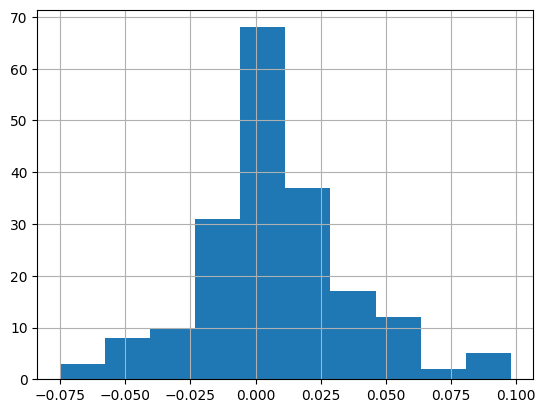

In [18]:
# plot hist fot y_pred
results["y_pred"].hist()
plt.show()

<Axes: >

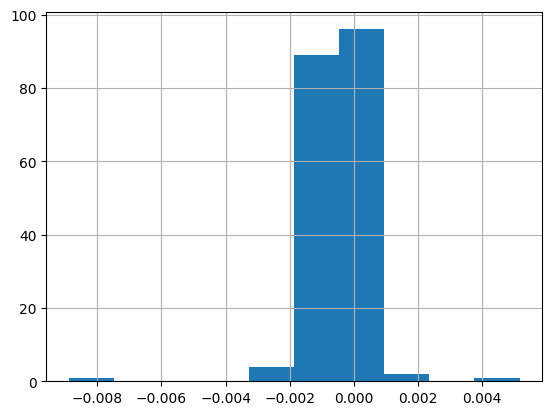

In [19]:
results["residuals"].hist()

> Linear Regression Feature Importance

In [20]:
# see featur importance with real column names
importance = model.coef_
features = X.columns
importance_df = pd.DataFrame({"feature": features, "importance": importance})
importance_df = importance_df.sort_values("importance", ascending=False)
importance_df

,feature,importance
12,Relative_Intraday_Price_Change,0.010016
10,signal,0.002893
7,negative_avg_score,0.001160
2,S&P500 Return,0.000956
9,btc_signal,0.000757
4,negative_count,0.000112
6,total_news_score,0.000077
3,rsi,0.000020
11,total_news_score_lag_100_sum,-0.000001
1,stoch_%D,-0.000003


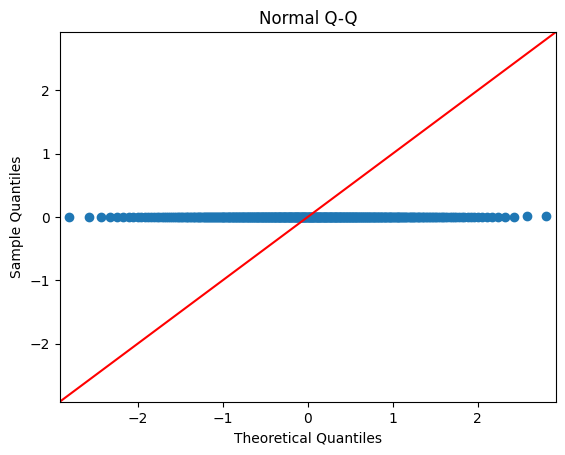

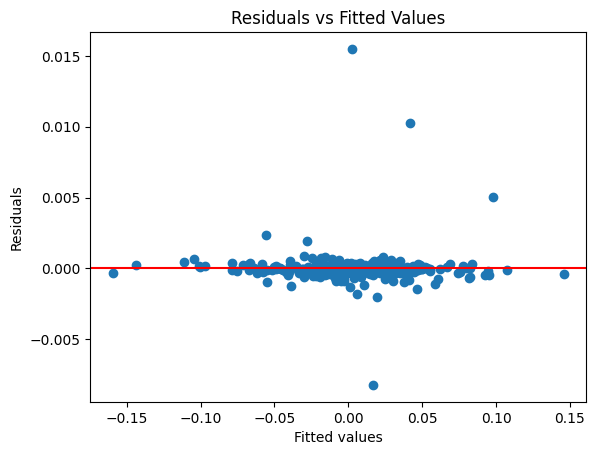

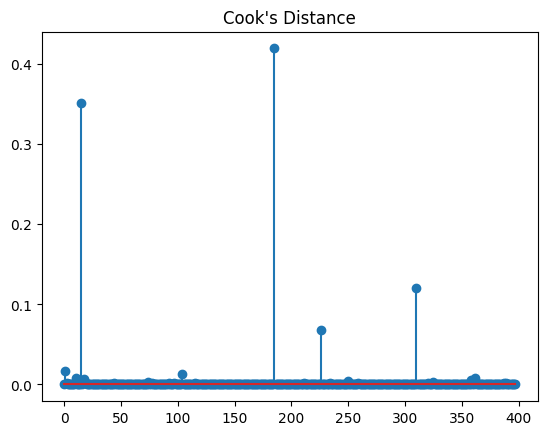

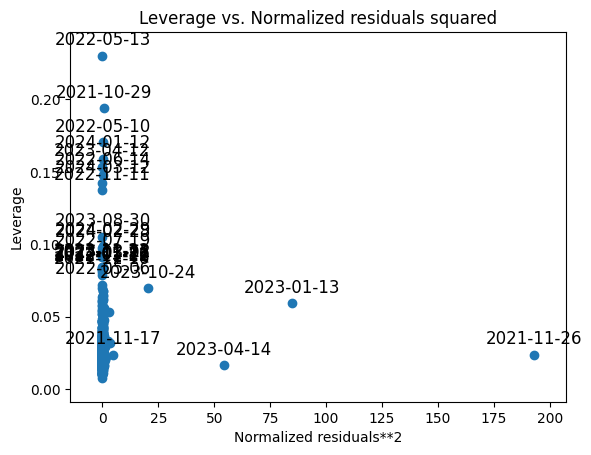

<Figure size 1000x1000 with 0 Axes>

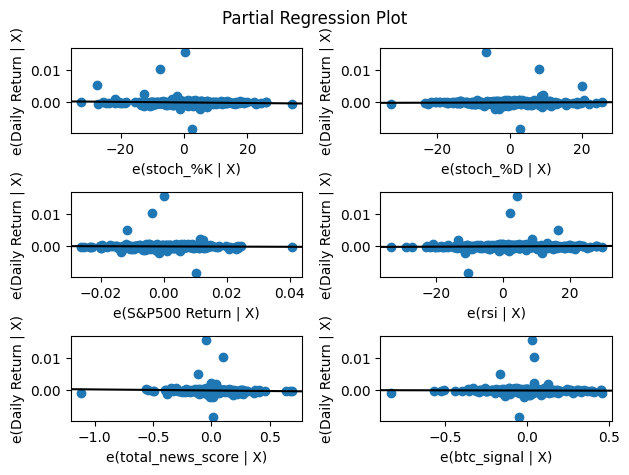

<Figure size 1000x1000 with 0 Axes>

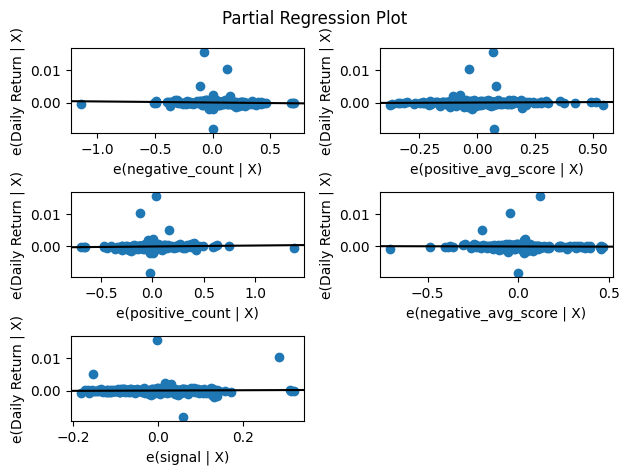

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit your model
model = sm.OLS(y, X)
results = model.fit(cov_type="HC3")

# Get predicted values
y_pred = results.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create a Q-Q plot of the residuals
sm.qqplot(results.resid, line="45")
plt.title("Normal Q-Q")
plt.show()

# Create a scatter plot
plt.scatter(y_pred, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="-")  # Add a horizontal line at y = 0
plt.title("Residuals vs Fitted Values")
plt.show()

# create a cooks distance plot
influence = results.get_influence()
cooks_distance = influence.cooks_distance[0]
plt.stem(range(len(cooks_distance)), cooks_distance)
plt.title("Cook's Distance")
plt.show()

# create a leverage plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2

plot_leverage_resid2(results)

# create a partial regression plot
from statsmodels.graphics.regressionplots import plot_partregress_grid

plt.figure(figsize=(10, 10))
# choose the variables you want to plot
plot_partregress_grid(
    results,
    ["stoch_%K", "stoch_%D", "S&P500 Return", "rsi", "total_news_score", "btc_signal"],
)
plt.tight_layout()

plt.show()

# now plot the other variables
plt.figure(figsize=(10, 10))
plot_partregress_grid(
    results,
    [
        "negative_count",
        "positive_avg_score",
        "positive_count",
        "negative_avg_score",
        "signal",
    ],
)
plt.tight_layout()

plt.show()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Daily Return   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.415e+05
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                        0.00
Time:                        23:31:25   Log-Likelihood:                          2140.6
No. Observations:                 398   AIC:                                     -4255.
Df Residuals:                     385   BIC:                                     -4203.
Df Model:                          13                                                  
Covariance Type:                  HC3                                                  
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
stoch_%K                       -8.516e-06   6.18e-06     -1.379      0.168   -2.06e-05    3.59e-06
stoch_%D                        3.128e-06   6.84e-06      0.458      0.647   -1.03e-05    1.65e-05
S&P500 Return                     -0.0029      0.004     -0.699      0.484      -0.011       0.005
rsi                             4.271e-06   3.53e-06      1.210      0.226   -2.65e-06    1.12e-05
negative_count                    -0.0003      0.000     -1.275      0.202      -0.001       0.000
positive_count                     0.0003      0.000      1.358      0.174      -0.000       0.001
total_news_score                  -0.0003      0.000     -1.351      0.177      -0.001       0.000
negative_avg_score                -0.0001      0.000     -0.322      0.747      -0.001       0.001
positive_avg_score                 0.0003      0.000      0.900      0.368      -0.000       0.001
btc_signal                        -0.0001      0.000     -0.482      0.630      -0.001       0.000
signal                             0.0005      0.001      0.341      0.733      -0.002       0.003
total_news_score_lag_100_sum   -1.947e-06   2.29e-06     -0.849      0.396   -6.44e-06    2.55e-06
Relative_Intraday_Price_Change     0.0100   2.89e-05    346.878      0.000       0.010       0.010
==============================================================================
Omnibus:                      608.669   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           230775.693
Skew:                           7.890   Prob(JB):                         0.00
Kurtosis:                     119.907   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC3)
[3] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
import pandas as pd

data = pd.read_csv("../Data/combined_Lin.csv")
# foreward fill the missing values
data = data.fillna(method="ffill")
# drop all data after "2023-03-01"
data = data[data["date_dt"] <= "2024-04-18"]
# make date_dt the index
data.set_index("date_dt", inplace=True)
# data["Relative_Intraday_Price_Change"] = data["Relative_Intraday_Price_Change"].shift(3)
btc_returns = pd.read_csv("../data/BTC_return.csv")
btc_returns.set_index("Unnamed: 0", inplace=True)
# chnange name from Returns To Daily Return
btc_returns = btc_returns.rename(columns={"Returns": "Daily Return"})

# replace Daily Return with btc returns
data = data.drop(columns=["Daily Return"])
data = pd.merge(data, btc_returns, on="date_dt", how="left")

# shift the returns by 1 day
data["Daily Return"] = data["Daily Return"].shift(-1)
# drop the last row
data = data.iloc[:-1]
# # make daily return a 15 day moving average
data["Daily Return"] = data["Daily Return"].rolling(15).mean()
# make daily return to a volatility measure
# data["Daily Return"] = data["Daily Return"].rolling(20).std()

# lag the gg_trend by 7 days
data["gg_trend"] = data["gg_trend"].shift(7)

data.dropna(inplace=True)
# drop magnitude column
data = data.drop(columns=["magnitude", "Direction"])
data.head()

/var/folders/m_/vmrb1n7d72xbmht2l2jtc4fh0000gn/T/ipykernel_91036/4225812286.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


KeyError: 'date_dt'

In [123]:
data

,Direction,magnitude,positive_count_bitcoin,negative_count_bitcoin,neutral_count_bitcoin,positive_avg_score_bitcoin,negative_avg_score_bitcoin,neutral_avg_score_bitcoin,total_news_count_bitcoin,total_news_score_bitcoin,...,DTB3_lag2,T5YIE_lag1,T5YIE_lag2,S&P500_Close_lag1,S&P500_Close_lag2,VIX_Close_lag1,VIX_Close_lag2,S&P_Return_lag1,S&P_Return_lag2,gg_trend
date_dt,,,,,,,,,,,,,,,,,,,,,
2021-04-15,1.0,6,10.0,2.0,10.0,0.907243,0.959677,0.849137,22.0,7.153077,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,0.137663
2021-04-16,0.0,1,6.0,10.0,7.0,0.623001,0.895473,0.726584,23.0,-5.216729,...,0.02,2.56,2.56,4124.660156,4124.660156,16.99,16.99,0.011094,0.011094,0.137663
2021-04-17,0.0,3,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,...,0.02,2.55,2.56,4170.419922,4124.660156,16.57,16.99,0.011094,0.011094,0.137663
2021-04-18,0.0,1,1.0,2.0,3.0,0.725935,0.804262,0.818327,6.0,-0.882590,...,0.02,2.57,2.55,4185.470215,4170.419922,16.25,16.57,0.003609,0.011094,0.018928
2021-04-19,0.0,4,2.0,6.0,1.0,0.886130,0.962285,0.899825,9.0,-4.001451,...,0.02,2.57,2.57,4185.470215,4185.470215,16.25,16.25,0.000000,0.003609,0.018928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,1.0,10,2.0,0.0,1.0,0.865381,0.000000,0.608785,3.0,1.730762,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.001116,0.142479
2024-04-02,0.0,1,2.0,0.0,1.0,0.865381,0.000000,0.608785,3.0,1.730762,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.000000,0.142479
2024-04-01,0.0,1,2.0,0.0,1.0,0.865381,0.000000,0.608785,3.0,1.730762,...,5.23,2.38,2.38,5254.350098,5254.350098,13.01,13.01,0.000000,0.000000,0.142479


In [68]:
data[["Daily Return", "Open", "Close"]]

,Daily Return,Open,Close
date_dt,,,
2021-04-29,-0.010195,55036.636719,54824.703125
2021-04-30,-0.005189,54858.089844,53555.109375
2021-05-01,-0.003266,53568.664062,57750.175781
2021-05-02,-0.003683,57714.664062,57828.050781
2021-05-03,0.001895,57825.863281,56631.078125
...,...,...,...
2024-03-30,0.001187,70744.796875,69892.828125
2024-03-31,0.003590,69893.445312,69645.304688
2024-04-02,0.002067,71333.484375,69702.148438


In [120]:
data["Close"].pct_change().shift(-1)

date_dt
2021-04-29   -0.023157
2021-04-30    0.078332
2021-05-01    0.001348
2021-05-02   -0.020699
2021-05-03    0.010051
                ...   
2024-03-30   -0.003541
2024-03-31    0.000816
2024-04-02    0.023407
2024-04-01   -0.082523
2024-04-03         NaN
Name: Close, Length: 1071, dtype: float64

In [119]:
data["Close"].pct_change().backfill()

/var/folders/m_/vmrb1n7d72xbmht2l2jtc4fh0000gn/T/ipykernel_75186/2800473736.py:1: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  data["Close"].pct_change().backfill()


date_dt
2021-04-29   -0.023157
2021-04-30   -0.023157
2021-05-01    0.078332
2021-05-02    0.001348
2021-05-03   -0.020699
                ...   
2024-03-30   -0.012045
2024-03-31   -0.003541
2024-04-02    0.000816
2024-04-01    0.023407
2024-04-03   -0.082523
Name: Close, Length: 1071, dtype: float64

Mean Squared Error: 1.3766621890129603e-05
R Squared: 0.6762432550426625


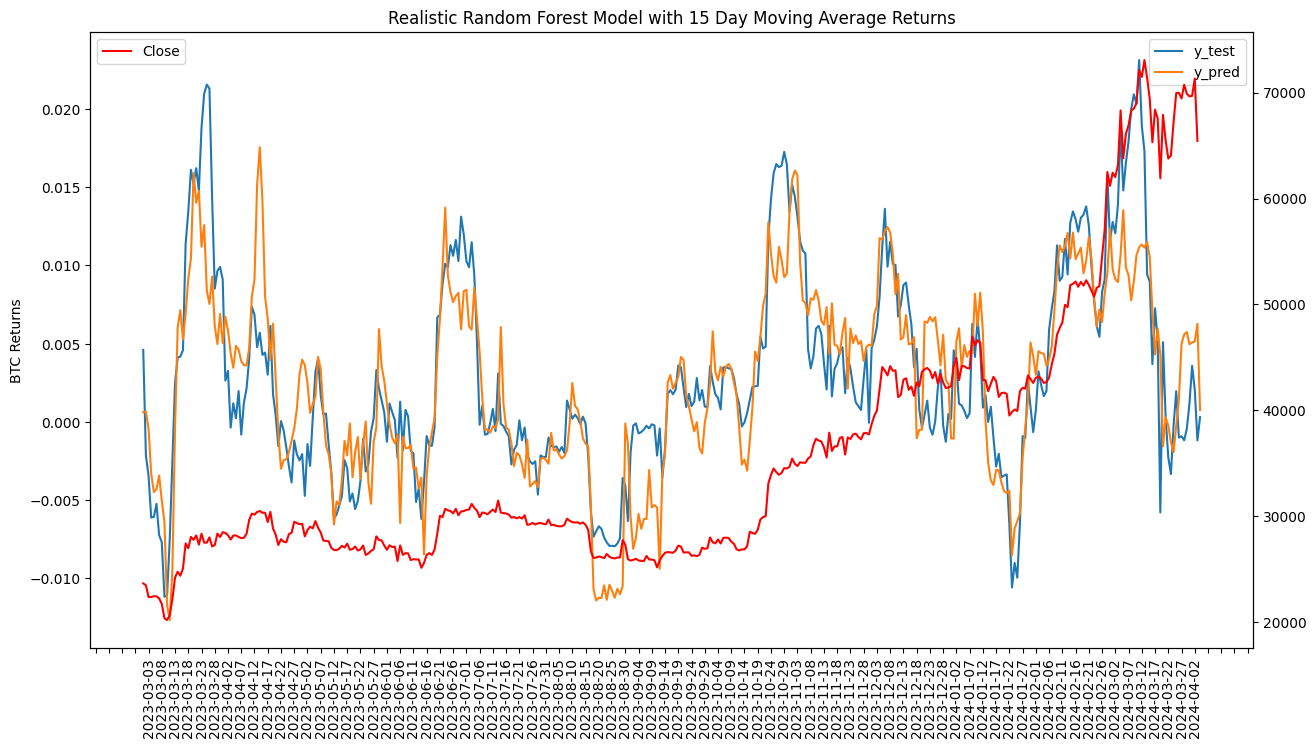

Feature ranking:
1. stoch_%D (0.40354488445908543)
2. rsi (0.33532862814997355)
3. stoch_%K (0.018810886375421713)
4. macd (0.015504807155477442)
5. TWITTER_NEG_SENTIMENT_COUNT (0.011451671900602693)
6. S&P500_Close_lag2 (0.010724622853531452)
7. DGS10 (0.010644101923658429)
8. S&P500 Close (0.010046308755188563)
9. S&P500_Close_lag1 (0.009266075068147412)
10. ATR (0.008090933013813525)
11. neutral_avg_score_coinbase (0.007517900127672606)
12. TWITTER_SENTIMENT_DAILY_AVG (0.006423615762869817)
13. macd_signal (0.005588811397548299)
14. 30D_Moving_STD (0.005300490461251064)
15. NEWS_SENTIMENT_DAILY_AVG (0.005008319101743329)
16. DGS10_lag1 (0.004913582261379323)
17. negative_avg_score_coinbase (0.004856520287843307)
18. Parkinson_Volatility (0.004834048450661596)
19. Volume (0.004261876368929137)
20. gg_trend (0.004180054631571486)
21. TWITTER_POS_SENTIMENT_COUNT (0.004113307103038707)
22. positive_avg_score_coinbase (0.004008706485474015)
23. total_news_count_coinbase (0.00399857287546

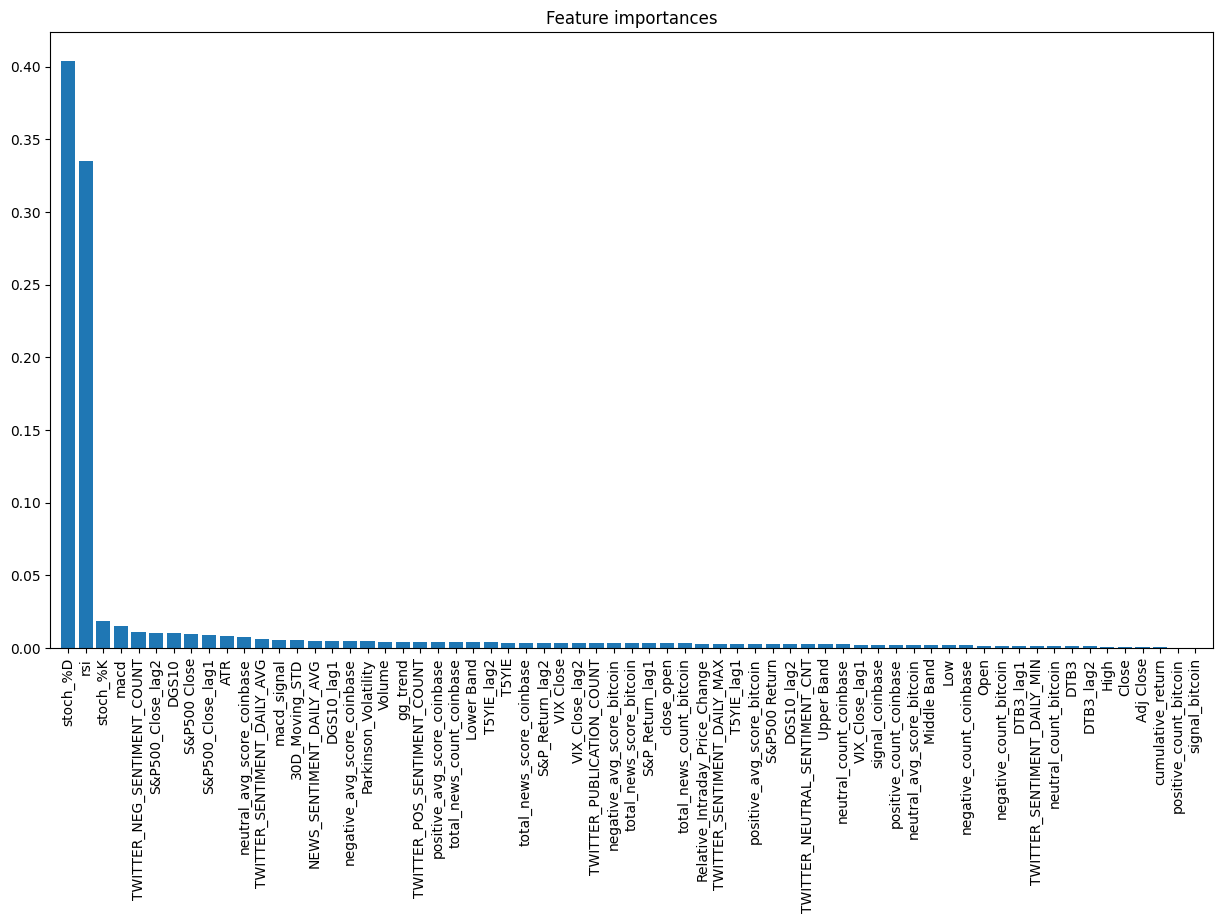

In [109]:
# random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# fit model
model = RandomForestRegressor()

data = data.dropna(subset=["Daily Return"])

X = data.drop(columns=["Daily Return"])


y = data["Daily Return"]


split_date = "2023-03-01"
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = model.score(X_test, y_test)
print(f"R Squared: {r_squared}")

# save model
joblib.dump(model, "../Modeling/models/ideal_RF/model_random_forest.pkl")

# make a dataframe with y_test and y_pred
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

# compute residuals
results["residuals"] = results["y_test"] - results["y_pred"]

# save results
results.to_csv("../Modeling/models/ideal_RF/results_random_forest.csv")

# plot results
plt.plot(results["y_test"], label="y_test")
plt.plot(results["y_pred"], label="y_pred")

plt.legend()
plt.title("Realistic Random Forest Model with 15 Day Moving Average Returns")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 8)
# Set x-axis major ticks to occur every 300 days.
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel("BTC Returns")
# plot the close price on the same graph on the right axis
plt.twinx()
plt.plot(X_test["Close"].shift(-1), color="red", label="Close")
plt.legend(loc="upper left")


plt.show()

# feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.gcf().set_size_inches(15, 8)

plt.show()

In [107]:
# if prediction is greater than 0
results["direction_pred"] = np.where(results["y_pred"] > 0, 1, 0)
results["direction_test"] = np.where(results["y_test"] > 0, 1, 0)

# calculate accuracy
accuracy = accuracy_score(results["direction_test"], results["direction_pred"])
print(f"Accuracy: {accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(results["direction_test"], results["direction_pred"])
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy: 0.8475
Confusion Matrix: 
[[113  34]
 [ 27 226]]


In [110]:
o = X_test["Close"].shift(-1).pct_change().dropna()

# merge results with o to get the direction of the close price
results = pd.merge(results, o, left_index=True, right_index=True, how="left")

/var/folders/m_/vmrb1n7d72xbmht2l2jtc4fh0000gn/T/ipykernel_75186/3497059828.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  o = X_test["Close"].shift(-1).pct_change().dropna()


In [111]:
results["direction_close"] = np.where(results["Close"] > 0, 1, 0)
results["direction_close_pred"] = np.where(results["y_pred"] > 0, 1, 0)

# calculate accuracy
accuracy = accuracy_score(results["direction_close"], results["direction_close_pred"])
print(f"Accuracy: {accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(
    results["direction_close"], results["direction_close_pred"]
)
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy: 0.505
Confusion Matrix: 
[[ 75 122]
 [ 76 127]]


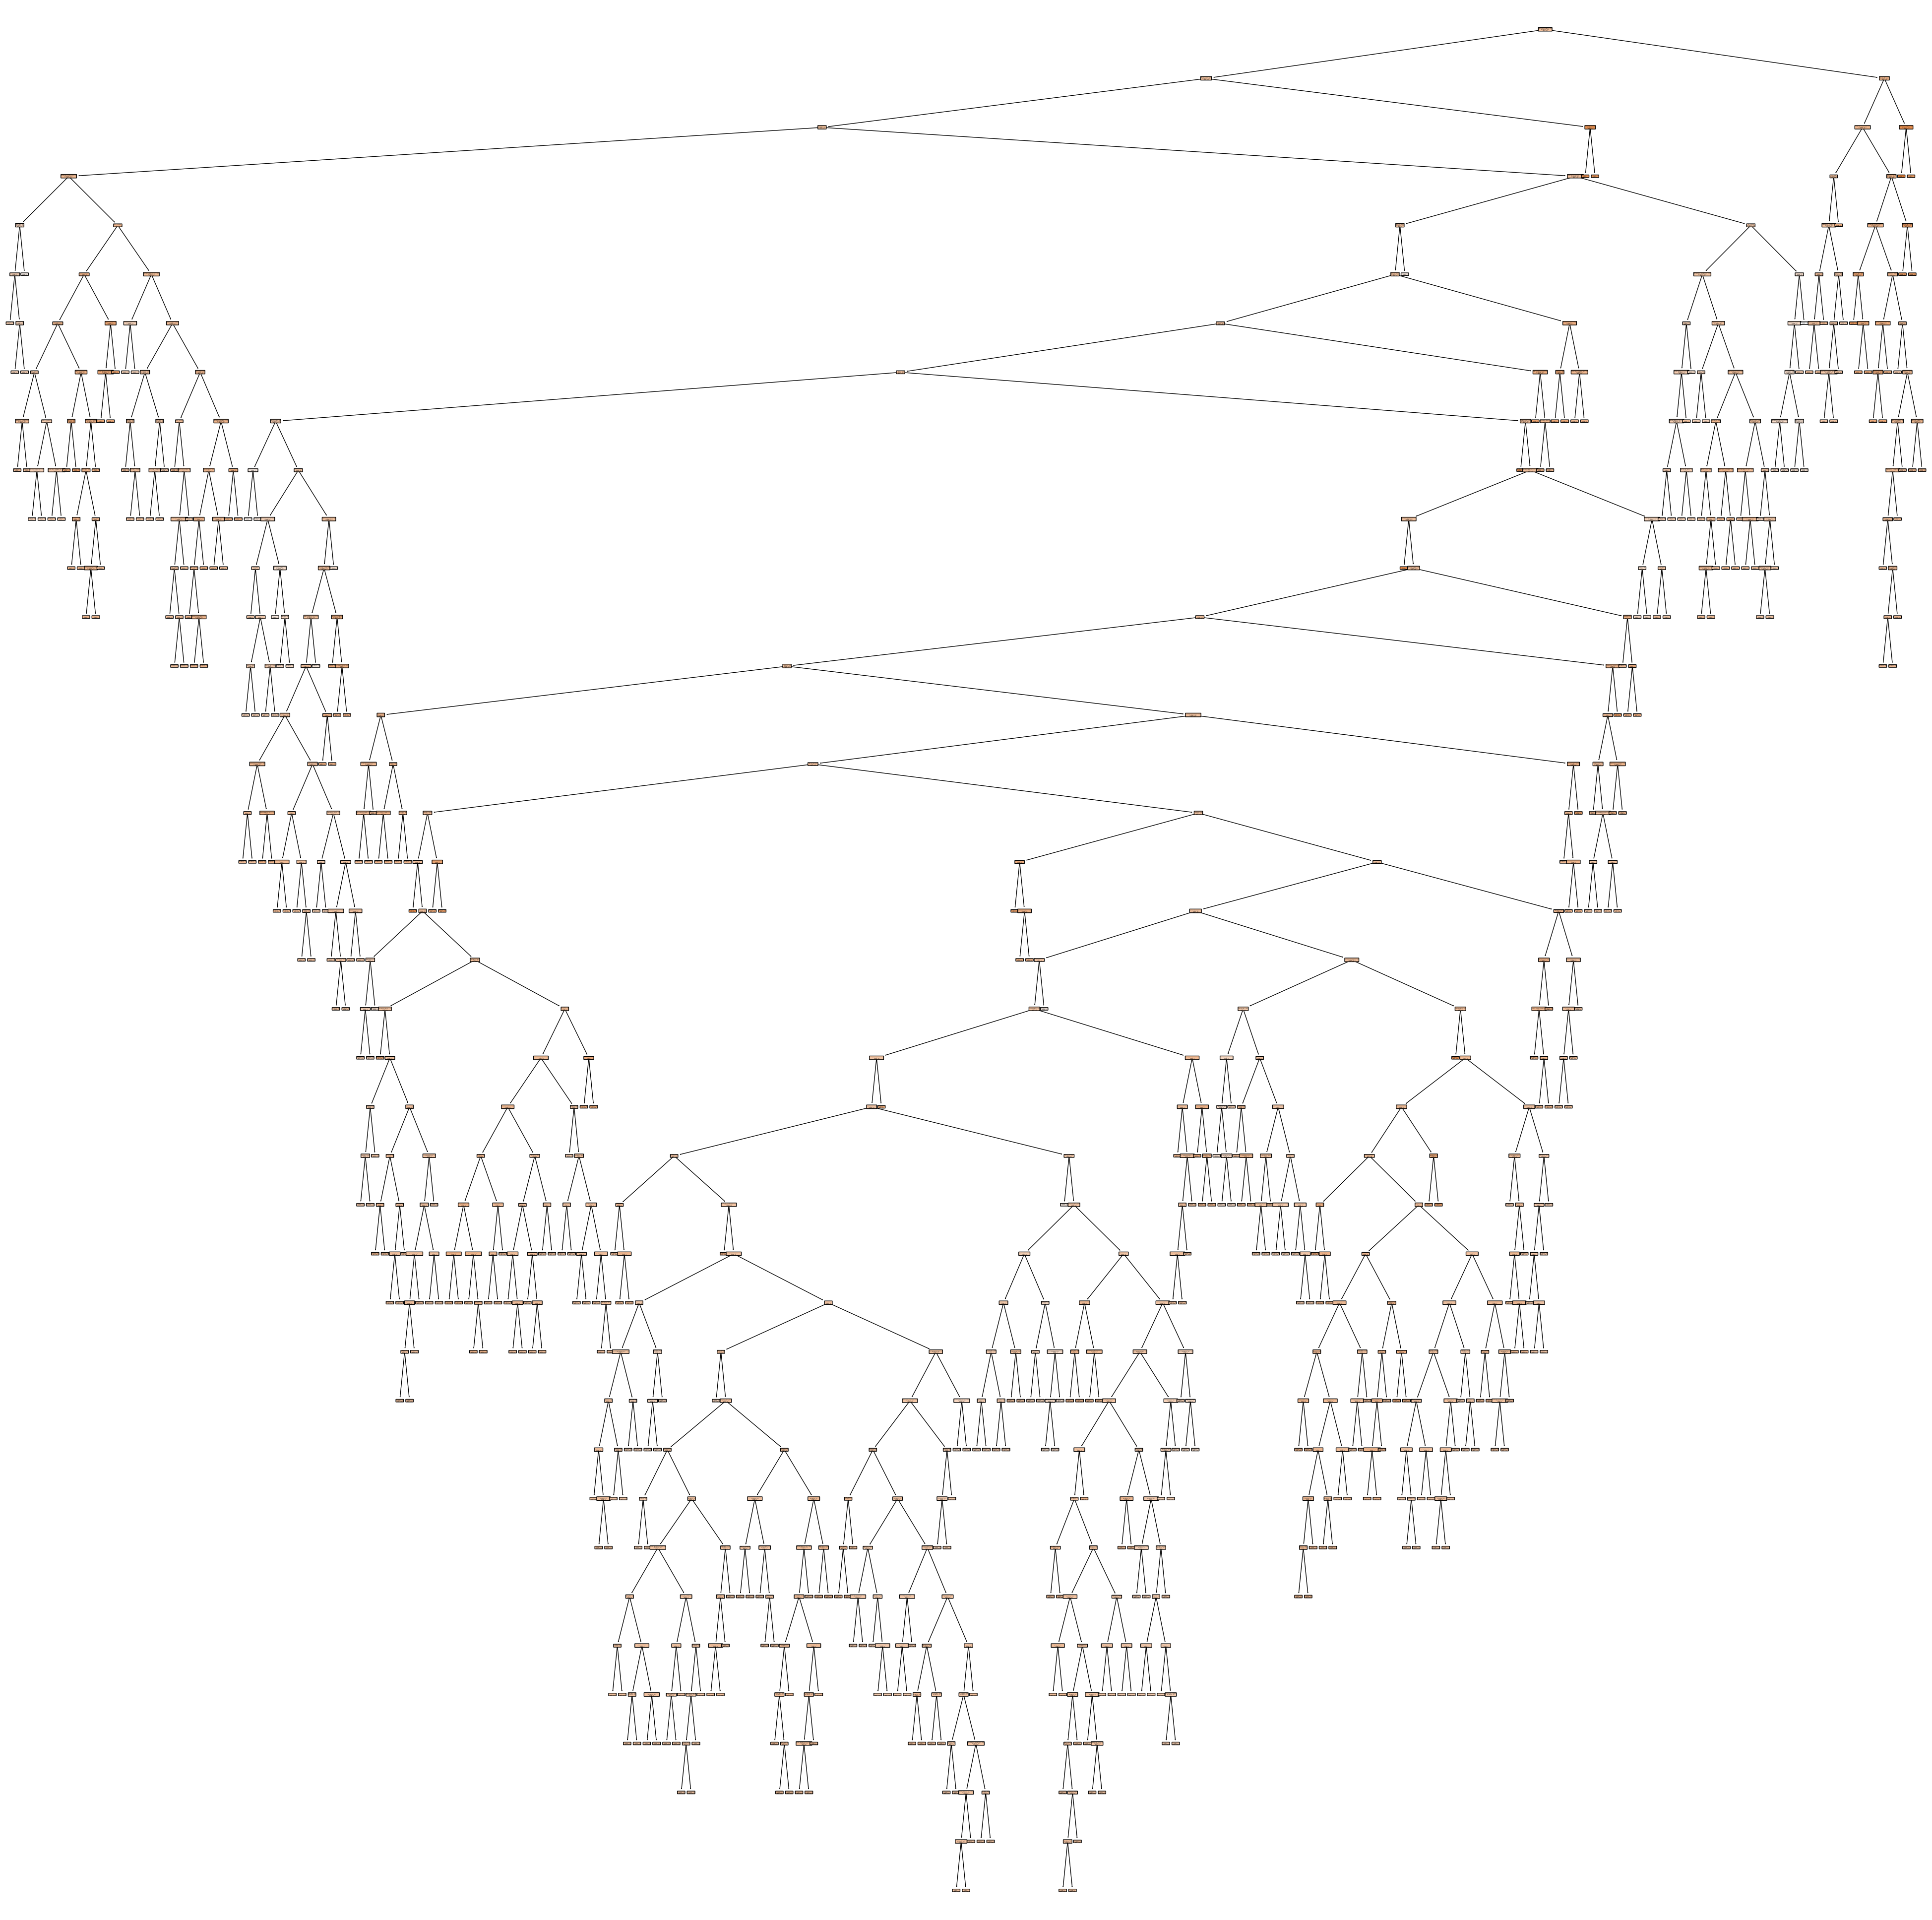

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assume `model` is your trained RandomForestClassifier or RandomForestRegressor
# Choose one tree from the forest
estimator = model.estimators_[5]

plt.figure(figsize=(50, 50))
plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
)
plt.savefig("../Modeling/models/ideal_RF/random_forest_tree.png")